<img src="img/CSK_banner.PNG" alt="banner">
# A (Brief) Introduction to Data Science
**CSK 2020**

Welcome to the wild world of data science! This is a notebook designed for UC Berkeley's CS Kickstart program, specifically . Feel free to read through this lab and interact with the content.

## Table of Contents
- The Jupyter Notebook
- "The Data Science Life Cycle"
- Data Analysis 
- Hypothesis and Predictions
- Next Steps


# 0: The Jupyter Notebook
[Jupyter Notebook](https://jupyter.org/) is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. The file that we are on now is a jupyter notebook, and it's used fairly extensively in the data science industry. It consists of a series of cells that you can run in real time.

Here's a quick rundown on how to use this notebook.

## 0.1 Cells
This notebook is made out of a series of cells. A cell is a multiline text input field, and its contents can be executed by using Shift-Enter, or by clicking either the “Play” button (▶|) in the toolbar, or Cell, Run in the menu bar. 

There are three types of cells:
- code cells
- markdown cells
- raw cells

You don't need to worry about the last type of cell; we'll be dealing with the first two today.
### 0.1.1 Code Cells
Code cells are cells where we can write and run code in python. Here's an example of a code cell, see if you can run it by pressing Shift-Enter (or Cell->Run in the menu)


In [2]:
x = 5
x

5

If you ran the cell correctly, the notebook should output the words "hello world". Pretty neat huh?

### 0.1.1 Markdown Cells
Markdown cells are cells like this one where we can write text and have it display in the notebook. In this notebook the only time you'll have to edit these types of cells will be in some free response answers like the one below. Edit the following cell and run it to see the text!

**Question 0.1** What's your name and favorite food?

Catherine Ice Cream

# 1."The Data Science Life Cycle"

The first thing we can ask ourselves about this question is "what exactly *is* data science in the first place?"

The [data8 textbook](https://www.inferentialthinking.com/chapters/01/1/intro.html) says the following about data science.
> Data Science is about drawing useful conclusions from large and diverse data sets through exploration, prediction, and inference. Exploration involves identifying patterns in information. Prediction involves using information we know to make informed guesses about values we wish we knew. Inference involves quantifying our degree of certainty: will the patterns that we found in our data also appear in new observations?

Hopefully we can continue to develop this definition during today's lab, starting off with a concept called the "data science life cycle."

## 1.1 The Life Cycle, deconstructed
The steps to the cycle are as follows: 
1. Formulating a question or problem
2. Acquiring and cleaning data
3. Conducting exploratory data analysis
4. Using prediction and inference to draw conclusions

In our following examples we are going to look at some data from UC Berkeley! 


In [1]:
# Necessary things we need to import that makes our data show up
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Table().with_column('Hi', [0,1,2,3])

Hi
0
1
2
3


In [4]:
# IMPORT THE DATA
by_maj = Table.read_table('data/by_major.csv') #creates a table from some data I downloaded
student_maj = Table.read_table('data/student_majors.csv')

In [6]:
by_maj.show(5)

Unnamed: 0,Academic Yr,Degree Level Desc,Degree Desc,College/School,Division,Department,Major,MajorShort,STEM Flag,Entry Status Desc,Residency Status Desc,Gender,Ethnicity,Headcount
0,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Female,Asian/Pacific Islander,26
1,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Female,Underrepresented Minority,10
2,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Female,White/Other,11
3,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Male,Asian/Pacific Islander,12
4,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Male,Underrepresented Minority,9


We haven't necessarily formed a question or a problem yet other than what does the data of the population at UC Berkeley look like but that's totally fine!

We will go through a small process of cleaning and then looking at the data next! (Since we took the time to load it all into our variables)

# 2. Data Analysis

The first step of any good data science project is **EDA** (**E**xploratory **D**ata **A**nalysis). Basically, you summarize their main characteristics of the data set in order to understand the data more, and to find directions to formulate predictions in. So let's jump in and do some EDA with the Berkeley majors dataset!

## 2.1 Student Majors and Basic Table Operations
We should first start off by taking a look at some of the data. We can look at the first _x_ rows of a table _t_ by using the following line: 
`t.show(x)`

In [8]:
# let's see what the data looks like (student_maj)
student_maj.show(5)

Academic Yr,Ungrad Grad Cd,Term/Year,Term Period,College/School,Division,Department,Major,Gender,Ethnicity,Headcount,Prorated Headcount,Number of Records,Entry Status Desc,MajorShort,STEM Flag,Residency Status Desc,Residency Fee Cd
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Asian/Pacific Islander,10,10,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Asian/Pacific Islander,7,7,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,International,18,18,1,Graduate,Chem Eng,STEM,International,International
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Underrepresented Minority,3,3,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Underrepresented Minority,1,1,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic


Taking a look at the first 5 rows shows us that this dataset is kinda large, and we're not interested in every single column, so let's remove some of the stuff here. 

To remove columns you can use `t.drop([labels])` or `t.drop(label)` where you can input a list of column names to get rid of or just one. Be careful because when you use this, it will give you a **new table** and not change your original!

In [9]:
# keeping only the interesting columns, and dropping the others
# make sure to reassign!
todelete = ["Term Period", "Division", "Department", "Prorated Headcount", "Number of Records",
                              "Entry Status Desc", "Major", "Residency Status Desc", "Residency Fee Cd"]
student_maj = student_maj.drop(todelete)
student_maj.show(5)

Academic Yr,Ungrad Grad Cd,Term/Year,College/School,Gender,Ethnicity,Headcount,MajorShort,STEM Flag
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Asian/Pacific Islander,10,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Asian/Pacific Islander,7,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,International,18,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,3,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,1,Chem Eng,STEM


In [10]:
# we can look at our new student_maj now


Great! This is much more readable. Suppose now we want to only look at the undergraduate population. How would we go about doing this? 

Well first we need a way to single out all the rows that tell us if the group is an undergrad or not. After a quick survey it looks like we can find this information in the "Ungrad Grad Cd" column! We can now use `t.where(label, condition)` to see when a column will equal true for certain values. 

In [11]:
# filtering out the grad students and removing the undergrad/grad column
# notice how we have two operations in a row: this is called "chaining" statements
undergrad_maj = student_maj.where("Ungrad Grad Cd", "Undergraduate") #where
undergrad_maj = student_maj.drop("Ungrad Grad Cd") #drop
undergrad_maj.show(5)

Academic Yr,Term/Year,College/School,Gender,Ethnicity,Headcount,MajorShort,STEM Flag
2018-19,2018 Fall,Clg of Chemistry,Female,Asian/Pacific Islander,10,Chem Eng,STEM
2018-19,2018 Fall,Clg of Chemistry,Female,Asian/Pacific Islander,7,Chem Eng,STEM
2018-19,2018 Fall,Clg of Chemistry,Female,International,18,Chem Eng,STEM
2018-19,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,3,Chem Eng,STEM
2018-19,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,1,Chem Eng,STEM


Much better! Now let's look at some of the basic attributes of our dataset. For example, let's see how many STEM vs. nonSTEM majors there are. Notice that we can't just look at the *number* of rows that have a STEM flag, since the `headcount` column can have values of more than 1 (this means 1 row could represent more than 1 individual). 

We are going to use a table functions called `.select(labels)` and `.group(label)` that will do this for us. First `t.select(label)` will select a column with that label. It then combines all the rows with certain attributes when we use `t.group(label)`.

In [12]:
# selecting our columns of interest, STEM Flag and Headcount
stem_sum = undergrad_maj.select('STEM Flag', 'Headcount')
stem_sum.show(10)

STEM Flag,Headcount
STEM,10
STEM,7
STEM,18
STEM,3
STEM,1
STEM,22
STEM,5
STEM,16
STEM,1
STEM,6


In [14]:
# grouping all the STEM and Not STEM together and summing the headcounts
stem_sum.group('STEM Flag', sum) 

STEM Flag,Headcount sum
Not STEM,664850
STEM,400197


Now its your turn! Pick variable(s) you're interest in and fill in the blanks to count how many people are in each group. Then *uncomment* the line by deleting the pound (#) sign and run the cell!

In [89]:
# undergrad_maj.select(______________, "Headcount").group(__________, sum)

## 2.2 Graphing and Visualization

Now that we have a grasp on how we can look at and manipulate data, let's figure out how to graph it! 

Using the data we "cleaned" above let's look at the female population @ Cal.

In [17]:
#let's look at student majors who are only female
fem_majors = student_maj.where('Gender', 'Female').group
fem_majors.show(5)

Academic Yr,Ungrad Grad Cd,Term/Year,College/School,Gender,Ethnicity,Headcount,MajorShort,STEM Flag
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Asian/Pacific Islander,10,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Asian/Pacific Islander,7,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,International,18,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,3,Chem Eng,STEM
2018-19,Graduate,2018 Fall,Clg of Chemistry,Female,Underrepresented Minority,1,Chem Eng,STEM


In [23]:
todelete = ['Academic Yr sum', 'Ungrad Grad Cd sum', 'Term/Year sum', 
            'College/School sum', 'Gender sum', 'Ethnicity sum', 'STEM Flag sum']
getcount = fem_majors.group('MajorShort', sum).drop(todelete)
getcount.show(5)

MajorShort,Headcount sum
Afr Am Stds,756
Afr Am Stds-Hum,4.5
Afr Am Stds-SS,3
Ag&Env Chem,9
Ag&Res Econ,781.5


We now have a count of how many undergraduate and graduate female identifying students combined there is for each major. It's fun to read a list of numbers, but it's more interesting to look at a **bar graph**, so let's learn how to do that now. 

We can use `t.barh(label)` to see a horizontal bar graph of all the rows in our data, where the y axis is the Major and the x axis will be the count. 

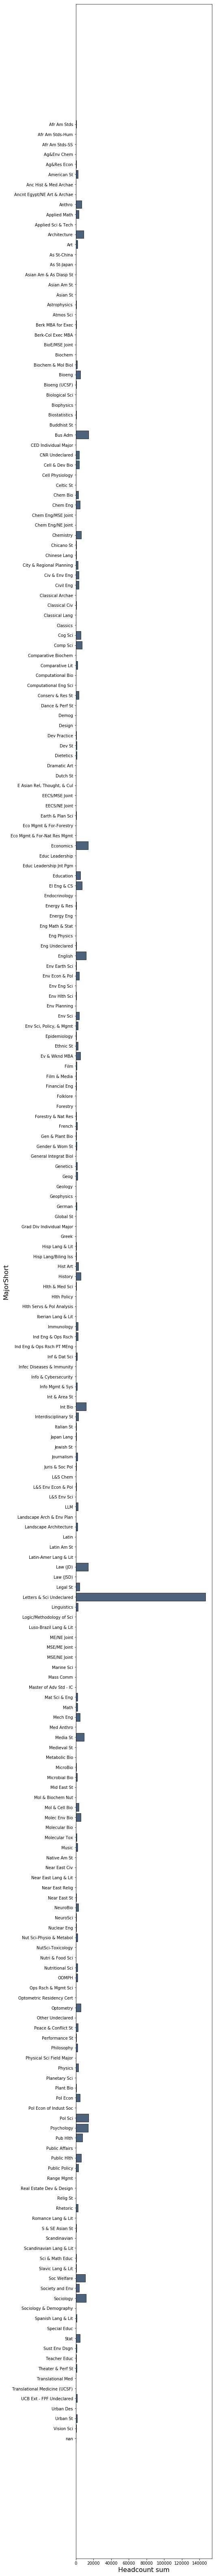

In [24]:
#let's look at the bar graph
getcount.barh('MajorShort')

As we can see though, this graph is far too large to be useful to anyone! Let's use a new table operation called `.sort(label)` to look at the data a little more closely. We are also going to use `take[]` which allows us to select a number of **rows** instead of columns. 

In [32]:
#let's get the top 6 majors that are
topfive = getcount.sort('Headcount sum', descending=True).take[0:6]
topfive

MajorShort,Headcount sum
Letters & Sci Undeclared,146524
Bus Adm,14364
Pol Sci,14235
Economics,14043
Psychology,13891.5
Law (JD),13885.5


In [33]:
#this cell breaks the code but you can remove the first row
#topfive.remove([0])
#topfive.show(5)

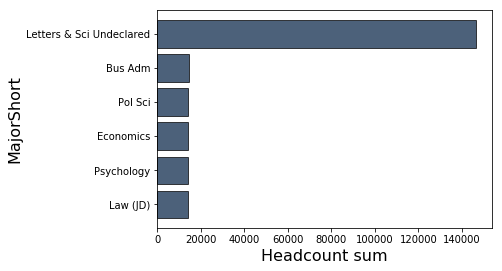

In [34]:
#graph of topfive, why does it look like the way it does?
topfive.barh('MajorShort')

Now, this graph might seem a little boring because the numbers are so similiar, so let's look at some other graphs that aren't so similiar in numbers! First let's get a count of the STEM vs NonSTEM students.

In [35]:
'hi'

'hi'

In [41]:
stem_gender = by_maj.select('STEM Flag', 'Gender') #this selects our stem and gender columns
stem_gender

STEM Flag,Gender
0,Female
0,Female
0,Female
0,Male
0,Male
0,Male
0,Female
0,Male
0,Female
0,Female


We now want to look at the numbers for STEM vs nonSTEM across gender. We can do this by doing a similiar process as above where we are going to group both the `STEM Flag` as well as `Gender`

In [42]:
stem_majors = stem_gender.group(['STEM Flag', 'Gender']) #we can group by multiple columns (STEM Flag, Gender)
stem_majors

STEM Flag,Gender,count
0,Decline to State,99
0,Female,4772
0,Male,3955
1,Decline to State,128
1,Female,4249
1,Male,4822


In [43]:
#do the same for nonSTEM
non_stem_majors = stem_gender.group(['STEM Flag', 'Gender'])

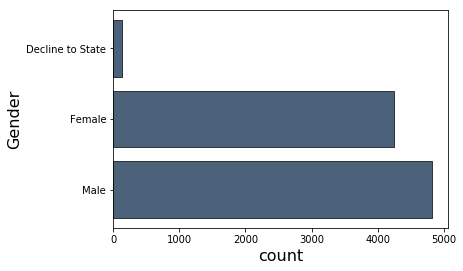

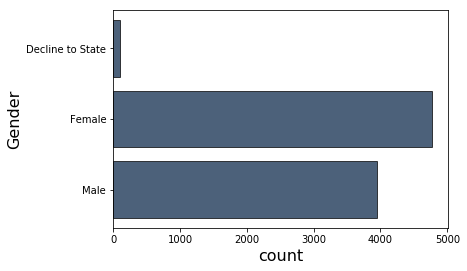

In [45]:
#separate into stem and non-stem majors by gender
stem_majors = stem_majors.where('STEM Flag', 1) #using where! 
non_stem_majors = non_stem_majors.where('STEM Flag', 0)

#graph gender distribution between stem vs. non-stem majors
stem_majors.select(['Gender', 'count']).barh('Gender')
non_stem_majors.select(['Gender', 'count']).barh('Gender')

Here we can see that there are more male indentifying individuals in the STEM majors, but more female identifying individuals in the nonSTEM majors! What might this mean and what might it indicate? 

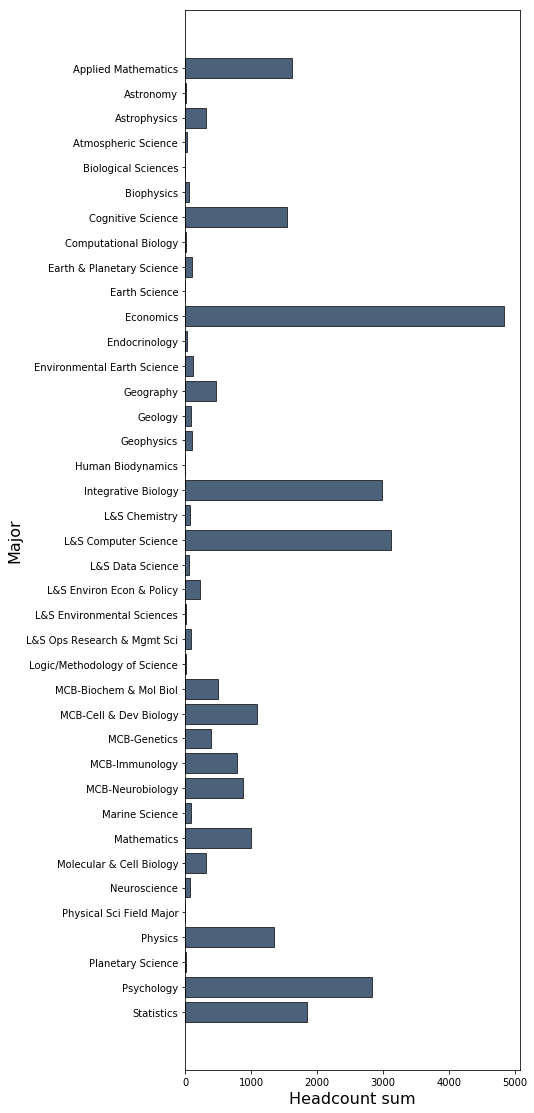

In [50]:
stem = by_maj.where('STEM Flag', 1)
stem = stem.where('College/School', 'Clg of Letters & Science')
stem = stem.group('Major', sum)
stem = stem.select('Major', 'Headcount sum')
stem.barh('Major')

Congrats! We've successfully graphed our data! 

Now, as an aside, let's do a demo of some other types of plots. We've gone over **bar plots** but let's look at some other types of graphs. 

In [51]:
brain = Table.read_table('data/brains.csv')
brain.show(10)

Species,Brain,Body,Gestation,Litter
Aardvark,9.6,2.2,31,5
Acouchis,9.9,0.78,98,1.2
African elephant,4480,2800,655,1
Agoutis,20.3,2.8,104,1.3
Axis deer,219,89,218,1
Badger,53,6,60,2.2
Barbary sheep,210,66,158,1.2
Barking deer,124,16,183,1.1
Bat-eared fox,28.5,3.2,65,4
Beaked whale,500,250,240,1.8


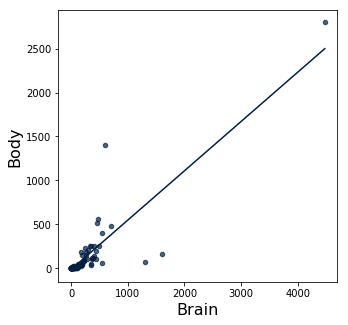

In [26]:
#scatter plot of brain size to body size
#todelete = ['Species', 'Gestation', 'Litter']
toplot = brain.select('Brain', 'Body')
toplot.scatter('Brain', fit_line=True)
#scatter the plot!!

This is an example of the **scatterplot**, a type of graph that lets you see **associations** and relationships really easily. It also allows you to see **outliers**, which we can see in this data by the giant body/brain size all the way in the right corner! We put a line of best fit which can help us look at what kind of association there might be. In this case it looks like a positive line, so there's a rough positive association.

In [52]:
#line plot demo
lineplot = Table().with_columns(
    'days',  make_array(0, 1, 2, 3, 4, 5),
    'bobas consumed', make_array(0, 1, 2, 2, 1, 3))

lineplot.show()

days,bobas consumed
0,0
1,1
2,2
3,2
4,1
5,3


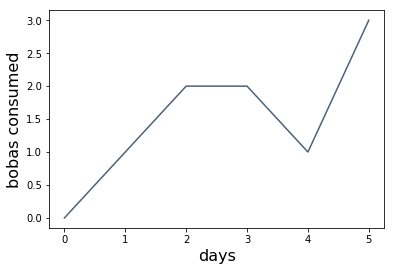

In [53]:
#we can make a regular line plot
lineplot.plot('days')

This is an example of a **line plot** at it graphs numerical data that is sequential in nature. You can see here that the days progress, so it indicates that there's some type of relationship between each day. This is opposed to the scatterplot, where you can assume that each point in the graph is separate from another. 

# 4. Next Steps

<img src="img/cal_data.png" alt="image of how data ties into COVID response" style="height: 4in;">

## Data Science @ UC Berkeley

There are a ton of ways to get involved with different data science opportunities at Berkeley!

- **Clubs** - Data Science Society at Berkeley, Opportunity Through Data, Big Data at Berkeley, Data Bears, Launchpad...you can find out more about different data science-focused student organizations on [Callink](https://callink.berkeley.edu/organizations) or Facebook!<br>
- **Course staff** - You can help teach the data science classes you've completed! [Data 8](http://data8.org/), the intro to data science class, is always in need of course staff because it's such a massive course. Lab assisting/tutoring/TAing is an awesome way to keep engaging with the material and get some really valuable experience teaching and helping students out. Plus, depending on what role you're hired for on course staff, you can get paid!<br>
- **URAP** - Cal runs the [Undergraduate Research Apprentice Program](https://urap.berkeley.edu/) every semester, with both new and continuing projects. It's a great opportunity to get hands-on experience working with faculty and/or grad students and learn how data science can be applied to a ton of different academic fields!<br>
- **Division of Data Science** - [The Division](https://data.berkeley.edu/) offers all sorts of helpful resources for students interested in data science, like peer advising where you can talk to other undergraduates for advice, conceptual help, and planning out your data science courses.<br>
- **Data Scholars** - [Data Scholars](https://data.berkeley.edu/academics/resources/data-scholars) is a program run by the Division that's dedicated to providing mentorship, prep, interview tips, resources, and so much more for minorities (like women!) in data science to introduce and prepare them to intern or work in industry.<br>
- **D-Lab** - [The D-Lab](https://dlab.berkeley.edu/) runs technical workshops almost every weekday about a wide variety of data science + computer science concepts and applications, from programming language introduction crash courses to natural language processing to neural networks. Check out their [calendar](https://dlab.berkeley.edu/calendar-node-field-date) to see what kinds of workshops they're offering soon!<br>

## Data Science in the World 

Data science is an increasingly popular field due to its interdisciplinary nature and the vast amount of potential applications. 

Here are just a few of the applications of data science with other fields:
- **Autonomous cars** are using data science applications to collect data on traffic flow, driver behavior, and more to improve self-driving technology as much as possible. 
- Data science can also be used in **healthcare** to detect and diagnose diseases earlier, to curate individual recommendations based on wearable technology sensors, and to improve the accuracy of diagnoses. 
- Incorporating data science skills into **public safety** can help catch criminals through facial recognition analysis, increase the accuracy of forensics, as well as limit racial bias and discrimination. 
- Data science also has lots of intersection with **environmental sustainability**, tracking climate change across the world to mitigate its negative impact. 

Data science as a field has so many opportunities and intersects with nearly every other field. Having the analysis and technical skills will allow you to conduct research and create recommendations to solve almost any problem. 


---

Developed by Catherine Gee, Sherry Fan, Anita Shen, Crystal Wang, Varsha Madapoosi. 

Materials and content adapted from [*Computational and Inferential Thinking*](https://www.inferentialthinking.com/chapters/intro.html) by Ani Adihikari and John Denero; [*Principles and Techniques of Data Science*](https://www.textbook.ds100.org/intro.html) by Sam Lau, Joey Gonzalez, and Deb Nolan. 